In [ ]:
import networkx as nx
from networkx.algorithms import approximation as approx
import pandas as pd
import math
import numpy as np

In [ ]:
data = pd.read_csv("property_grid.csv")
x = data["x"].values
y = data["y"].values
coordinates = np.array((x,y)).T
print(coordinates)
radius = 7.5 #fixed for testing
#TODO: timing

G = nx.Graph()
    
# Add nodes with their positions
for idx, coord in enumerate(coordinates):
    G.add_node(idx, pos=coord)

n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0], 
                        coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

In [ ]:
#initial graph (test example)
# atomlist =  [
#     (1, 2),
#     (2, 3),
#     (1, 4),
#     (3, 4)
# ]
# G = nx.Graph(atomlist)
colors = ["red", "blue", "green", "yellow", "magenta", "cyan", "orange", "purple"]
color_dict = {} #nodes matched to colors
color_counter = 0
G1 = G.copy()
while (G1.number_of_nodes() > 0):
    mis = approx.maximum_independent_set(G1)  
    for node in mis:
        color_dict[node] = colors[color_counter]
    G1.remove_nodes_from(mis)
    color_counter+=1
    
#convert color dict to color list for correct order
color_list = [""]*len(color_dict)
for node in color_dict:
    color_list[node - 1] = color_dict[node]

#show final graph
pos = nx.spring_layout(G, iterations=100, seed=42)
nx.draw(
   G,
   pos=pos,
   with_labels=True, #testing
   node_color=color_list
)

In [ ]:
# testing
# G = nx.Graph(
#     [
#         (1, 2),
#         (2, 3),
#         (1, 4),
#         (3, 4)
#     ]
# )

# mis = approx.maximum_independent_set(G)
# print(mis)

# pos = nx.spring_layout(G, iterations=100, seed=42)
# nx.draw(
#     G,
#     pos=pos,
#     with_labels=True,
#     node_color=["tab:red" if n in mis else "tab:blue" for n in G],
# )

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from networkx.algorithms import approximation as approx

# --- Step 1: Load Data and Add "appetite" Column if Missing ---
csv_file = "property_grid.csv"
data = pd.read_csv(csv_file)

# If the 'appetite' column does not exist, create it with random values (1-5)
if "appetite" not in data.columns:
    np.random.seed(42)  # For reproducibility
    data["appetite"] = np.random.randint(1, 6, size=len(data))
    data.to_csv(csv_file, index=False)  # Save updated CSV (optional)
    print("Added 'appetite' column to CSV file.")

# Extract x, y, and appetite values
x = data["x"].values
y = data["y"].values
appetite = data["appetite"].values

# Combine x and y into a single array of coordinates
coordinates = np.array(list(zip(x, y)))
print("Coordinates:")
print(coordinates)

# Define proximity threshold (radius) to decide if properties are risk-correlated
radius = 7.5

# --- Step 2: Construct the Graph with Node Attributes ---
G = nx.Graph()
for idx, (coord, app) in enumerate(zip(coordinates, appetite)):
    G.add_node(idx, pos=coord, appetite=app)

n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0],
                      coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

# --- Step 3: Graph Coloring via Iterative Independent Sets ---
colors = ["red", "blue", "green", "yellow", "magenta", "cyan", "orange", "purple"]
color_dict = {}   # Map node to its assigned color
group_nodes = {}  # Map group index to list of nodes in that group
color_counter = 0

# Create a copy of G to extract independent sets iteratively without modifying G
G1 = G.copy()
while G1.number_of_nodes() > 0:
    mis = approx.maximum_independent_set(G1)
    group_nodes[color_counter] = list(mis)
    for node in mis:
        color_dict[node] = colors[color_counter]
    G1.remove_nodes_from(mis)
    color_counter += 1

# Create a color list for all nodes (ensuring correct order)
color_list = [color_dict[node] for node in sorted(G.nodes())]

# --- Step 4: Calculate Average Appetite for Each Group ---
group_appetite = {}
for group, nodes in group_nodes.items():
    group_values = [G.nodes[node]["appetite"] for node in nodes]
    group_appetite[group] = np.mean(group_values)

print("\nGroup Average Appetite Scores:")
for group, avg in group_appetite.items():
    print(f"Group {group}: Average Appetite = {avg:.2f}")

# --- Step 5: Apply Insurance Portfolio Logic ---
# Example: Select groups for a risk-averse investor (e.g., average appetite <= 3)
desired_appetite_max = 3
selected_groups = [group for group, avg in group_appetite.items() if avg <= desired_appetite_max]

print("\nSelected Portfolio Groups for Risk-Averse Investor (appetite <= 3):", selected_groups)
for group in selected_groups:
    print(f"Properties in Group {group}:", group_nodes[group])

# --- Step 6: Visualize the Graph ---
# Compute layout (using spring_layout for a balanced view)
pos = nx.spring_layout(G, iterations=100, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, with_labels=True, node_color=color_list, node_size=500, font_color='white')
plt.title("Property Portfolio Clusters with Appetite-Based Grouping")
plt.show()


In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install networkx

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from networkx.algorithms import approximation as approx

# --- Step 1: Load Data and Create Coordinates ---
# Load property data which includes x, y coordinates and an appetite score (1-5)
data = pd.read_csv("property_grid.csv")
x = data["x"].values
y = data["y"].values
# Assumes the CSV has an "appetite" column representing the risk appetite score
appetite = data["appetite"].values

# Combine x and y coordinates into a single array
coordinates = np.array(list(zip(x, y)))
print("Coordinates:")
print(coordinates)

# Define a fixed radius for testing; properties within this distance are considered correlated
radius = 7.5

# --- Step 2: Construct the Graph with Node Attributes ---
G = nx.Graph()

# Add nodes to the graph with attributes 'pos' (position) and 'appetite'
for idx, (coord, app) in enumerate(zip(coordinates, appetite)):
    G.add_node(idx, pos=coord, appetite=app)

# Add edges between nodes if the Euclidean distance between them is <= the threshold (radius)
n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0],
                      coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

# --- Step 3: Graph Coloring via Iterative Independent Sets ---
# Pre-define a list of colors for the groups
colors = ["red", "blue", "green", "yellow", "magenta", "cyan", "orange", "purple"]

# Dictionaries for node color assignments and grouping the nodes by independent set
color_dict = {}  # Maps node -> color
group_nodes = {} # Maps group index -> list of nodes in that group
color_counter = 0

# Copy G to perform iterative removal of independent sets without modifying the original graph
G1 = G.copy()
while G1.number_of_nodes() > 0:
    # Compute an approximate maximum independent set
    mis = approx.maximum_independent_set(G1)
    # Record the nodes in the current group
    group_nodes[color_counter] = list(mis)
    # Assign the group color to all nodes in the MIS
    for node in mis:
        color_dict[node] = colors[color_counter]
    # Remove these nodes from the copied graph
    G1.remove_nodes_from(mis)
    color_counter += 1

# Construct a color list for all nodes in the original graph based on node order
color_list = [color_dict[node] for node in sorted(G.nodes())]

# --- Step 4: Calculate Average Appetite for Each Group ---
group_appetite = {}
for group, nodes in group_nodes.items():
    # Extract each node's appetite attribute and compute the average for the group
    group_values = [G.nodes[node]["appetite"] for node in nodes]
    group_appetite[group] = np.mean(group_values)

print("\nGroup Average Appetite Scores:")
for group, avg in group_appetite.items():
    print(f"Group {group}: Average Appetite = {avg:.2f}")

# --- Step 5: Apply Insurance Portfolio Logic ---
# Example: For a risk-averse investor, select groups with an average appetite <= 3
desired_appetite_max = 3
selected_groups = [group for group, avg in group_appetite.items() if avg <= desired_appetite_max]

print("\nSelected Portfolio Groups for Risk-Averse Investor (appetite <= 3):", selected_groups)
for group in selected_groups:
    print(f"Properties in Group {group}:", group_nodes[group])

# --- Step 6: Visualize the Graph ---
# Use spring layout for visualization with fixed seed for reproducibility
pos = nx.spring_layout(G, iterations=100, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, with_labels=True, node_color=color_list, node_size=500, font_color='white')
plt.title("Property Portfolio Clusters with Appetite-Based Grouping")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from networkx.algorithms import approximation as approx

# --- Step 1: Load Data and Add "appetite" Column if Missing ---
csv_file = "property_grid.csv"
data = pd.read_csv(csv_file)

# If the 'appetite' column does not exist, create it with random values (1-5)
if "appetite" not in data.columns:
    np.random.seed(42)  # For reproducibility
    data["appetite"] = np.random.randint(1, 6, size=len(data))
    data.to_csv(csv_file, index=False)  # Save updated CSV (optional)
    print("Added 'appetite' column to CSV file.")

# Extract x, y, and appetite values
x = data["x"].values
y = data["y"].values
appetite = data["appetite"].values

# Combine x and y into a single array of coordinates
coordinates = np.array(list(zip(x, y)))
print("Coordinates:")
print(coordinates)

# Define proximity threshold (radius) to decide if properties are risk-correlated
radius = 7.5

# --- Step 2: Construct the Graph with Node Attributes ---
G = nx.Graph()
for idx, (coord, app) in enumerate(zip(coordinates, appetite)):
    G.add_node(idx, pos=coord, appetite=app)

n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0],
                      coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

# --- Step 3: Graph Coloring via Iterative Independent Sets ---
colors = ["red", "blue", "green", "yellow", "magenta", "cyan", "orange", "purple"]
color_dict = {}   # Map node to its assigned color
group_nodes = {}  # Map group index to list of nodes in that group
color_counter = 0

# Create a copy of G to extract independent sets iteratively without modifying G
G1 = G.copy()
while G1.number_of_nodes() > 0:
    mis = approx.maximum_independent_set(G1)
    group_nodes[color_counter] = list(mis)
    for node in mis:
        color_dict[node] = colors[color_counter]
    G1.remove_nodes_from(mis)
    color_counter += 1

# Create a color list for all nodes (ensuring correct order)
color_list = [color_dict[node] for node in sorted(G.nodes())]

# --- Step 4: Calculate Average Appetite for Each Group ---
group_appetite = {}
for group, nodes in group_nodes.items():
    group_values = [G.nodes[node]["appetite"] for node in nodes]
    group_appetite[group] = np.mean(group_values)

print("\nGroup Average Appetite Scores:")
for group, avg in group_appetite.items():
    print(f"Group {group}: Average Appetite = {avg:.2f}")

# --- Step 5: Apply Insurance Portfolio Logic ---
# Example: Select groups for a risk-averse investor (e.g., average appetite <= 3)
desired_appetite_max = 3
selected_groups = [group for group, avg in group_appetite.items() if avg <= desired_appetite_max]

print("\nSelected Portfolio Groups for Risk-Averse Investor (appetite <= 3):", selected_groups)
for group in selected_groups:
    print(f"Properties in Group {group}:", group_nodes[group])

# --- Step 6: Visualize the Graph ---
# Compute layout (using spring_layout for a balanced view)
pos = nx.spring_layout(G, iterations=100, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, with_labels=True, node_color=color_list, node_size=500, font_color='white')
plt.title("Property Portfolio Clusters with Appetite-Based Grouping")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from networkx.algorithms import approximation as approx


csv_file = "property_grid.csv"
data = pd.read_csv(csv_file)


if "appetite" not in data.columns:
    np.random.seed(42)  
    data["appetite"] = np.random.randint(1, 6, size=len(data))
    data.to_csv(csv_file, index=False)  
    print("Added 'appetite' column to CSV file.")


x = data["x"].values
y = data["y"].values
appetite = data["appetite"].values


coordinates = np.array(list(zip(x, y)))
print("Coordinates:")
print(coordinates)


radius = 7.5


G = nx.Graph()
for idx, (coord, app) in enumerate(zip(coordinates, appetite)):
    G.add_node(idx, pos=coord, appetite=app)


n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0],
                      coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)


cmap = cm.get_cmap('tab20') 
color_dict = {}    
group_nodes = {}   
color_counter = 0


G1 = G.copy()
while G1.number_of_nodes() > 0:
    
    mis = approx.maximum_independent_set(G1)
    
    group_nodes[color_counter] = list(mis)
    
    group_color = cmap(color_counter % 20)  
    for node in mis:
        color_dict[node] = group_color
    
    G1.remove_nodes_from(mis)
    color_counter += 1


color_list = [color_dict[node] for node in sorted(G.nodes())]


group_appetite = {}
for group, nodes in group_nodes.items():
    group_values = [G.nodes[node]["appetite"] for node in nodes]
    group_appetite[group] = np.mean(group_values)

print("\nGroup Average Appetite Scores:")
for group, avg in group_appetite.items():
    print(f"Group {group}: Average Appetite = {avg:.2f}")


desired_appetite_max = 2
selected_groups = [group for group, avg in group_appetite.items() if avg <= desired_appetite_max]

print("\nSelected Portfolio Groups for Risk-Averse Investor (appetite <= 3):", selected_groups)
for group in selected_groups:
    print(f"Properties in Group {group}:", group_nodes[group])


pos = nx.spring_layout(G, iterations=100, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, with_labels=True, node_color=color_list, node_size=500, font_color='white')
plt.title("Property Portfolio Clusters with Appetite-Based Grouping")
plt.show()


Coordinates:
[[ 4 14]
 [ 6  0]
 [15  4]
 [14 12]
 [ 5  7]
 [ 9 11]
 [ 2 15]
 [ 7 10]
 [ 9  0]
 [14  1]
 [ 4 11]
 [14 13]
 [ 6 14]
 [ 9 13]
 [ 8  8]
 [ 4  4]
 [ 7 12]
 [15  0]
 [ 0  6]
 [ 8  1]
 [11 14]
 [ 3  1]
 [ 8  7]
 [ 8  9]
 [ 1  2]
 [12  7]
 [13 15]
 [ 0 13]
 [10  0]
 [ 4 10]
 [ 8 11]
 [ 1  6]
 [ 4  9]
 [14 11]
 [15 13]
 [ 9  1]
 [ 6  5]
 [ 2  1]
 [11  4]
 [ 9  8]
 [ 4 12]
 [ 0 11]
 [15 14]
 [ 5 11]
 [13  2]
 [ 2  4]
 [ 0  1]
 [ 3  4]
 [ 7 13]
 [ 9 12]
 [ 1 11]
 [ 6  2]
 [15  8]
 [ 4  5]
 [ 7  3]
 [12 13]
 [ 8  6]
 [11  8]
 [15  7]
 [12  3]
 [ 5  6]
 [12 10]
 [ 5 15]
 [14  7]
 [ 1 14]
 [ 0  9]
 [12  6]
 [ 2 11]
 [ 9  4]
 [ 2  7]
 [14  9]
 [ 5  4]
 [13  8]
 [13  6]
 [ 3  7]
 [ 6 15]
 [ 1  7]
 [ 3 15]
 [10  5]
 [13  1]
 [10 10]
 [ 2  5]
 [15  6]
 [ 5  0]
 [ 8  3]
 [ 4  8]
 [10  9]
 [ 2 10]
 [ 1  4]
 [10 11]
 [ 5  5]
 [11 13]
 [13 14]
 [15  1]
 [12  0]
 [ 3  2]
 [12  1]
 [10  2]
 [ 0  7]
 [ 6  1]]

Original Maximum Independent Set (MIS): [0, 1, 2, 31, 34]


/var/folders/gz/0k54xkt95ndc26__4__ql_vm0000gn/T/ipykernel_2919/3787238670.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')  # Supports up to 20 distinct colors (cycling thereafter)



Group Average Appetite Scores:
Group 0: Average Appetite = 3.80
Group 1: Average Appetite = 3.33
Group 2: Average Appetite = 4.00
Group 3: Average Appetite = 1.75
Group 4: Average Appetite = 3.40
Group 5: Average Appetite = 2.80
Group 6: Average Appetite = 4.20
Group 7: Average Appetite = 3.00
Group 8: Average Appetite = 3.75
Group 9: Average Appetite = 3.60
Group 10: Average Appetite = 2.75
Group 11: Average Appetite = 3.75
Group 12: Average Appetite = 2.25
Group 13: Average Appetite = 2.00
Group 14: Average Appetite = 2.33
Group 15: Average Appetite = 3.33
Group 16: Average Appetite = 3.33
Group 17: Average Appetite = 3.67
Group 18: Average Appetite = 3.33
Group 19: Average Appetite = 1.50
Group 20: Average Appetite = 1.50
Group 21: Average Appetite = 3.50
Group 22: Average Appetite = 2.00
Group 23: Average Appetite = 5.00
Group 24: Average Appetite = 3.00
Group 25: Average Appetite = 1.50
Group 26: Average Appetite = 1.00
Group 27: Average Appetite = 1.00
Group 28: Average Appetite

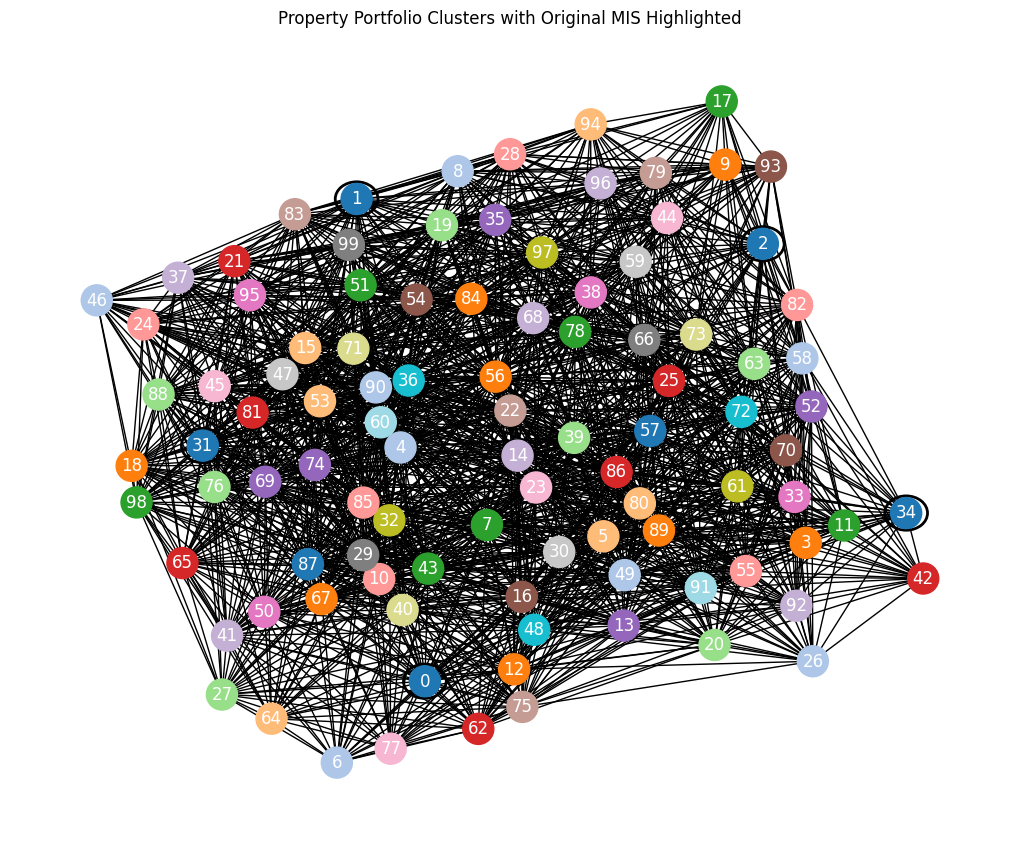

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from networkx.algorithms import approximation as approx
import matplotlib.patches as patches

# --- Step 1: Load Data and Add "appetite" Column if Missing ---
csv_file = "property_grid.csv"
data = pd.read_csv(csv_file)

if "appetite" not in data.columns:
    np.random.seed(42)  # For reproducibility
    data["appetite"] = np.random.randint(1, 6, size=len(data))
    data.to_csv(csv_file, index=False)  # Optionally, save the updated CSV
    print("Added 'appetite' column to CSV file.")

# Extract x, y, and appetite values
x = data["x"].values
y = data["y"].values
appetite = data["appetite"].values

# Combine x and y coordinates
coordinates = np.array(list(zip(x, y)))
print("Coordinates:")
print(coordinates)

# --- Step 2: Construct the Graph with Node Attributes ---
G = nx.Graph()
for idx, (coord, app) in enumerate(zip(coordinates, appetite)):
    G.add_node(idx, pos=coord, appetite=app)

# Set proximity threshold (radius) for determining connected nodes (correlated wildfire risk)
radius = 7.5
n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0],
                      coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

# --- Step 3: Compute the Original Maximum Independent Set (MIS) ---
# This is computed on the original graph and will be highlighted separately.
mis_original = approx.maximum_independent_set(G)
print("\nOriginal Maximum Independent Set (MIS):", sorted(mis_original))

# --- Step 4: Partition the Graph into Groups via Iterative Independent Sets ---
# We'll use a dynamic color map so that we don't run out of predefined colors.
cmap = cm.get_cmap('tab20')  # Supports up to 20 distinct colors (cycling thereafter)
color_dict = {}    # Node -> color (as an RGBA tuple)
group_nodes = {}   # Group index -> list of nodes (each group is an independent set)
color_counter = 0

# Create a copy of G for iterative removal
G1 = G.copy()
while G1.number_of_nodes() > 0:
    # Compute an approximate independent set on the copy
    mis = approx.maximum_independent_set(G1)
    group_nodes[color_counter] = list(mis)
    group_color = cmap(color_counter % 20)  # Get a color from colormap
    for node in mis:
        color_dict[node] = group_color
    G1.remove_nodes_from(mis)
    color_counter += 1

# Construct a color list in order of node indices
color_list = [color_dict[node] for node in sorted(G.nodes())]

# --- Step 5: Calculate Group Average Appetite & Apply Portfolio Logic ---
group_appetite = {}
for group, nodes in group_nodes.items():
    group_values = [G.nodes[node]["appetite"] for node in nodes]
    group_appetite[group] = np.mean(group_values)

print("\nGroup Average Appetite Scores:")
for group, avg in group_appetite.items():
    print(f"Group {group}: Average Appetite = {avg:.2f}")

# Example portfolio logic: For a risk-averse investor, select groups with average appetite <= 3.
desired_appetite_max = 3
selected_groups = [group for group, avg in group_appetite.items() if avg <= desired_appetite_max]

print("\nSelected Portfolio Groups for Risk-Averse Investor (appetite <= 3):", selected_groups)
for group in selected_groups:
    print(f"Properties in Group {group}:", group_nodes[group])

# --- Step 6: Visualize the Graph ---
# Use spring_layout for reproducible node placement
pos = nx.spring_layout(G, iterations=100, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, with_labels=True, node_color=color_list, node_size=500, font_color='white')

# Overlay a black outline around nodes belonging to the original MIS
ax = plt.gca()
for node in mis_original:
    x_pos, y_pos = pos[node]
    # Create a circle patch to outline the node
    circle = plt.Circle((x_pos, y_pos), 0.05, color='black', fill=False, linewidth=2)
    ax.add_patch(circle)

plt.title("Property Portfolio Clusters with Original MIS Highlighted")
plt.show()


Coordinates:
[[ 4 14]
 [ 6  0]
 [15  4]
 [14 12]
 [ 5  7]
 [ 9 11]
 [ 2 15]
 [ 7 10]
 [ 9  0]
 [14  1]
 [ 4 11]
 [14 13]
 [ 6 14]
 [ 9 13]
 [ 8  8]
 [ 4  4]
 [ 7 12]
 [15  0]
 [ 0  6]
 [ 8  1]
 [11 14]
 [ 3  1]
 [ 8  7]
 [ 8  9]
 [ 1  2]
 [12  7]
 [13 15]
 [ 0 13]
 [10  0]
 [ 4 10]
 [ 8 11]
 [ 1  6]
 [ 4  9]
 [14 11]
 [15 13]
 [ 9  1]
 [ 6  5]
 [ 2  1]
 [11  4]
 [ 9  8]
 [ 4 12]
 [ 0 11]
 [15 14]
 [ 5 11]
 [13  2]
 [ 2  4]
 [ 0  1]
 [ 3  4]
 [ 7 13]
 [ 9 12]
 [ 1 11]
 [ 6  2]
 [15  8]
 [ 4  5]
 [ 7  3]
 [12 13]
 [ 8  6]
 [11  8]
 [15  7]
 [12  3]
 [ 5  6]
 [12 10]
 [ 5 15]
 [14  7]
 [ 1 14]
 [ 0  9]
 [12  6]
 [ 2 11]
 [ 9  4]
 [ 2  7]
 [14  9]
 [ 5  4]
 [13  8]
 [13  6]
 [ 3  7]
 [ 6 15]
 [ 1  7]
 [ 3 15]
 [10  5]
 [13  1]
 [10 10]
 [ 2  5]
 [15  6]
 [ 5  0]
 [ 8  3]
 [ 4  8]
 [10  9]
 [ 2 10]
 [ 1  4]
 [10 11]
 [ 5  5]
 [11 13]
 [13 14]
 [15  1]
 [12  0]
 [ 3  2]
 [12  1]
 [10  2]
 [ 0  7]
 [ 6  1]]

Original Maximum Independent Set (MIS): [0, 1, 2, 31, 34]


/var/folders/gz/0k54xkt95ndc26__4__ql_vm0000gn/T/ipykernel_2919/3910681645.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')  # This colormap supports up to 20 distinct colors (cycling thereafter)



Group Average Appetite Scores:
Group 0: Average Appetite = 3.80
Group 1: Average Appetite = 3.33
Group 2: Average Appetite = 4.00
Group 3: Average Appetite = 1.75
Group 4: Average Appetite = 3.40
Group 5: Average Appetite = 2.80
Group 6: Average Appetite = 4.20
Group 7: Average Appetite = 3.00
Group 8: Average Appetite = 3.75
Group 9: Average Appetite = 3.60
Group 10: Average Appetite = 2.75
Group 11: Average Appetite = 3.75
Group 12: Average Appetite = 2.25
Group 13: Average Appetite = 2.00
Group 14: Average Appetite = 2.33
Group 15: Average Appetite = 3.33
Group 16: Average Appetite = 3.33
Group 17: Average Appetite = 3.67
Group 18: Average Appetite = 3.33
Group 19: Average Appetite = 1.50
Group 20: Average Appetite = 1.50
Group 21: Average Appetite = 3.50
Group 22: Average Appetite = 2.00
Group 23: Average Appetite = 5.00
Group 24: Average Appetite = 3.00
Group 25: Average Appetite = 1.50
Group 26: Average Appetite = 1.00
Group 27: Average Appetite = 1.00
Group 28: Average Appetite

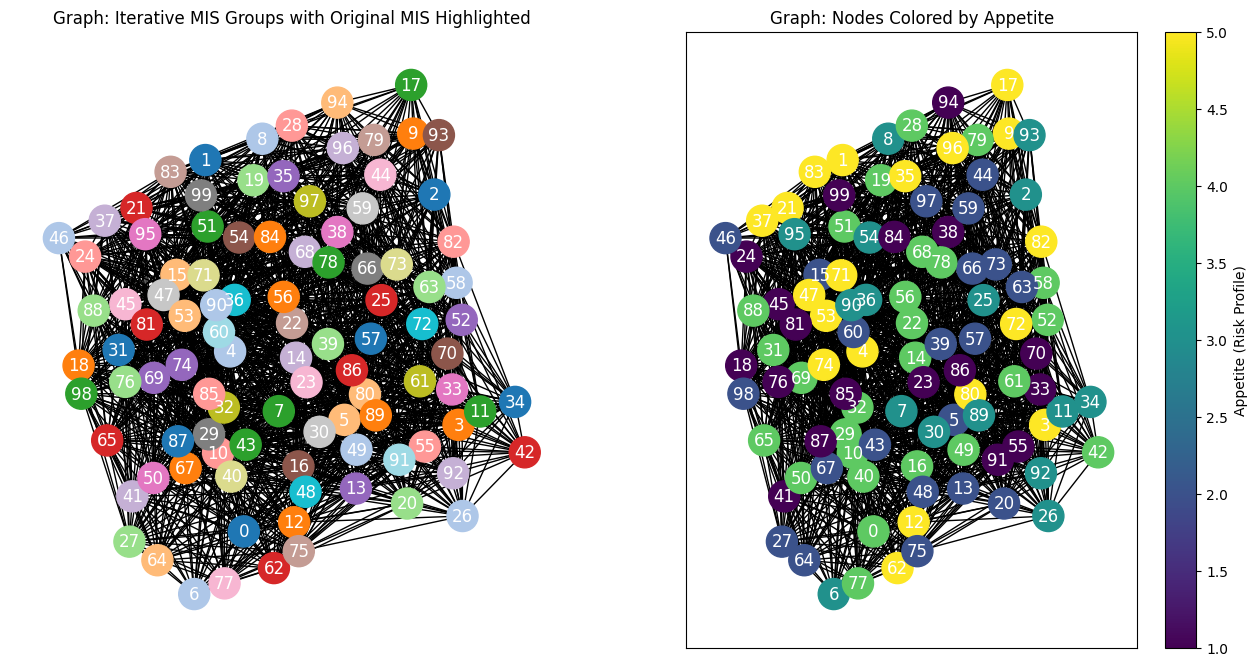

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from networkx.algorithms import approximation as approx
import time



# --- Step 1: Load Data and Add "appetite" Column if Missing ---
csv_file = "property_grid.csv"
data = pd.read_csv(csv_file)

if "appetite" not in data.columns:
    np.random.seed(42)  # For reproducibility
    data["appetite"] = np.random.randint(1, 6, size=len(data))
    data.to_csv(csv_file, index=False)  # Optionally, save the updated CSV
    print("Added 'appetite' column to CSV file.")

# Extract x, y, and appetite values
x = data["x"].values
y = data["y"].values
appetite = data["appetite"].values

# Combine x and y coordinates into an array of coordinate pairs
coordinates = np.array(list(zip(x, y)))
print("Coordinates:")
print(coordinates)

# --- Step 2: Construct the Graph with Node Attributes ---
G = nx.Graph()
for idx, (coord, app) in enumerate(zip(coordinates, appetite)):
    G.add_node(idx, pos=coord, appetite=app)

# Define a proximity threshold (radius) for determining connected nodes (correlated wildfire risk)
radius = 7.5
n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0],
                      coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

# --- Step 3: Compute the Original Maximum Independent Set (MIS) ---
# This MIS is computed on the original graph and will be highlighted in the left plot.


start_time = time.time()
mis_original = approx.maximum_independent_set(G)
print("\nOriginal Maximum Independent Set (MIS):", sorted(mis_original))
#print("timer", t)

# --- Step 4: Partition the Graph into Groups via Iterative Independent Sets ---
# Use a matplotlib colormap to automatically generate distinct colors for groups.
cmap = cm.get_cmap('tab20')  # This colormap supports up to 20 distinct colors (cycling thereafter)
color_dict = {}    # Maps node -> assigned color (as an RGBA tuple)
group_nodes = {}   # Maps group index -> list of nodes (each group is an independent set)
color_counter = 0

# Create a copy of G to iteratively remove nodes (ensuring the original G stays unchanged)
G1 = G.copy()
while G1.number_of_nodes() > 0:
    mis = approx.maximum_independent_set(G1)
    group_nodes[color_counter] = list(mis)
    group_color = cmap(color_counter % 20)  # Get a distinct color from colormap
    for node in mis:
        color_dict[node] = group_color
    G1.remove_nodes_from(mis)
    color_counter += 1

# Create a color list in order of node indices
color_list = [color_dict[node] for node in sorted(G.nodes())]

# --- Step 5: Calculate Group Average Appetite & Apply Portfolio Logic ---
group_appetite = {}
for group, nodes in group_nodes.items():
    group_values = [G.nodes[node]["appetite"] for node in nodes]
    group_appetite[group] = np.mean(group_values)

print("\nGroup Average Appetite Scores:")
for group, avg in group_appetite.items():
    print(f"Group {group}: Average Appetite = {avg:.2f}")

# For example: Risk-averse investor selecting groups with an average appetite <= 3.
desired_appetite_max = 3
selected_groups = [group for group, avg in group_appetite.items() if avg <= desired_appetite_max]
print("\nSelected Portfolio Groups for Risk-Averse Investor (appetite <= 3):", selected_groups)
for group in selected_groups:
    print(f"Properties in Group {group}:", group_nodes[group])

print("--- %s seconds ---" % (time.time() - start_time))

# --- Step 6: Visualize Both Graphs Side-by-Side ---
# Use spring_layout for reproducible node placement
pos = nx.spring_layout(G, iterations=100, seed=42)

# Prepare a figure with two subplots: Left: Original MIS Groups; Right: Appetite-Based Coloring
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left Plot: Original Graph with MIS Grouping and Original MIS Highlighted
nx.draw(G, pos=pos, with_labels=True, node_color=color_list, node_size=500, font_color='white', ax=ax1)
ax1.set_title("Graph: Iterative MIS Groups with Original MIS Highlighted")
# Highlight nodes from original MIS using a black outline
for node in mis_original:
    x_pos, y_pos = pos[node]
    circle = plt.Circle((x_pos, y_pos), 0.05, color='black', fill=False, linewidth=2)
    ax1.add_patch(circle)

# Right Plot: Graph Colored by Appetite Values
# Map the appetite values (1 to 5) to colors using a continuous colormap.
node_appetites = [G.nodes[node]["appetite"] for node in sorted(G.nodes())]
nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=node_appetites, cmap=plt.cm.viridis, node_size=500, ax=ax2)
nx.draw_networkx_edges(G, pos=pos, ax=ax2)
nx.draw_networkx_labels(G, pos=pos, font_color='white', ax=ax2)
ax2.set_title("Graph: Nodes Colored by Appetite")
# Add a colorbar for appetite values
cbar = plt.colorbar(nodes, ax=ax2)
cbar.set_label("Appetite (Risk Profile)")

plt.show()
plt.savefig("risk_groups.png")



In [ ]:
pip install timer

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from networkx.algorithms import approximation as approx

# --- Step 1: Load Data and Ensure "appetite" Column ---
csv_file = "property_grid.csv"
data = pd.read_csv(csv_file)

if "appetite" not in data.columns:
    np.random.seed(42)  # For reproducibility
    data["appetite"] = np.random.randint(1, 6, size=len(data))
    data.to_csv(csv_file, index=False)  # Save updated CSV, if desired
    print("Added 'appetite' column to CSV file.")

# Extract x, y, and appetite values
x = data["x"].values
y = data["y"].values
appetite_vals = data["appetite"].values

# Combine x and y coordinates into an array of coordinate pairs
coordinates = np.array(list(zip(x, y)))
print("Coordinates:")
print(coordinates)

# --- Step 2: Construct the Graph with Attributes ---
G = nx.Graph()
for idx, (coord, app) in enumerate(zip(coordinates, appetite_vals)):
    G.add_node(idx, pos=coord, appetite=app)

# Define proximity threshold (radius) for connecting nodes (simulating wildfire correlation)
radius = 7.5
n = len(coordinates)
for i in range(n):
    for j in range(i + 1, n):
        if math.hypot(coordinates[i][0] - coordinates[j][0],
                      coordinates[i][1] - coordinates[j][1]) <= radius:
            G.add_edge(i, j)

# --- Step 3: Compute the Original Maximum Independent Set (MIS) ---
# This is computed on the original graph and will be highlighted in the left plot.
mis_original = approx.maximum_independent_set(G)
print("\nOriginal Maximum Independent Set (MIS):", sorted(mis_original))

# --- Step 4: Partition the Graph via Iterative Independent Sets ---
# Use a colormap to assign each independent set a unique color.
cmap = cm.get_cmap('tab20')  # Can support up to 20 distinct colors before cycling.
color_dict = {}    # Mapping: node -> original group color (RGBA tuple)
group_nodes = {}   # Mapping: group index -> list of nodes (each is an independent set)
group_counter = 0

# Create a copy of G so that we can iteratively remove nodes.
G1 = G.copy()
while G1.number_of_nodes() > 0:
    mis = approx.maximum_independent_set(G1)
    group_nodes[group_counter] = list(mis)
    group_color = cmap(group_counter % 20)  # Get a color from the colormap.
    for node in mis:
        color_dict[node] = group_color
    G1.remove_nodes_from(mis)
    group_counter += 1

# Build the original color list for all nodes (in node order).
original_color_list = [color_dict[node] for node in sorted(G.nodes())]

# --- Step 5: Create New Coloring Adjusted by Desired Appetite ---
# The rule is: for each node, if the node's own appetite is NOT the desired value and
# it has at least one neighbor with the desired appetite, then change its color.
desired_appetite = 5
special_color = (1, 0.5, 0, 1)  # An RGBA tuple for an orange-ish color.

# Start with the original grouping colors.
new_color_dict = color_dict.copy()
for node in G.nodes():
    # Only consider nodes that do not already have the desired appetite.
    if G.nodes[node]['appetite'] != desired_appetite:
        # Check the neighbors of the node.
        for neighbor in G.neighbors(node):
            if G.nodes[neighbor]['appetite'] == desired_appetite:
                new_color_dict[node] = special_color
                break  # Exit once one neighbor qualifies.
                
# Create a new color list for visualization.
new_color_list = [new_color_dict[node] for node in sorted(G.nodes())]

# --- Step 6: Visualize Both Graphs Side-by-Side ---
# Use a reproducible layout.
pos = nx.spring_layout(G, iterations=100, seed=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left Plot: Original Grouping Based on Iterative MIS (with original MIS highlighted).
nx.draw(G, pos=pos, with_labels=True, node_color=original_color_list, 
        node_size=500, font_color='white', ax=ax1)
ax1.set_title("Original MIS Grouping\n(Original MIS highlighted)")
for node in mis_original:
    x_pos, y_pos = pos[node]
    circle = plt.Circle((x_pos, y_pos), 0.05, color='black', fill=False, linewidth=2)
    ax1.add_patch(circle)

# Right Plot: New Grouping Adjusted by Local Appetite.
nx.draw(G, pos=pos, with_labels=True, node_color=new_color_list, 
        node_size=500, font_color='white', ax=ax2)
ax2.set_title("New Grouping Adjusted by Desired Appetite\n(Recolored if neighbor's appetite == {})".format(desired_appetite))

plt.show()
